In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [24]:
df = pd.read_csv('../../Datasets/digit_recognizer/train.csv')

In [27]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
y = df.label
df = df.drop(['label'], axis=1)

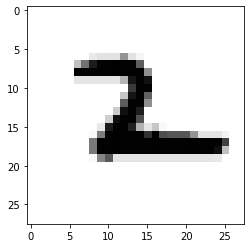

In [34]:
plt.imshow(np.array(df.iloc[44]).reshape(28, 28), cmap=plt.cm.binary)

In [44]:
df = tf.keras.utils.normalize(df, axis=1)
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33,
                                                    random_state=42)

In [52]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(784, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [53]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
880/880 [==============================] - 3s 3ms/step - loss: 0.0578 - accuracy: 0.9814
Epoch 2/10
880/880 [==============================] - 3s 3ms/step - loss: 0.0423 - accuracy: 0.9860
Epoch 3/10
880/880 [==============================] - 3s 3ms/step - loss: 0.0380 - accuracy: 0.9880
Epoch 4/10
880/880 [==============================] - 3s 3ms/step - loss: 0.0266 - accuracy: 0.9918
Epoch 5/10
880/880 [==============================] - 3s 3ms/step - loss: 0.0209 - accuracy: 0.9930
Epoch 6/10
880/880 [==============================] - 3s 3ms/step - loss: 0.0212 - accuracy: 0.9929
Epoch 7/10
880/880 [==============================] - 3s 3ms/step - loss: 0.0185 - accuracy: 0.9937
Epoch 8/10
880/880 [==============================] - 3s 3ms/step - loss: 0.0143 - accuracy: 0.9954
Epoch 9/10
880/880 [==============================] - 3s 3ms/step - loss: 0.0167 - accuracy: 0.9946
Epoch 10/10
880/880 [==============================] - 3s 3ms/step - loss: 0.0136 - accuracy: 0.9955

In [58]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss, val_acc)

434/434 [==============================] - 1s 2ms/step - loss: 0.1247 - accuracy: 0.9729
0.12470261752605438 0.9728716015815735


2


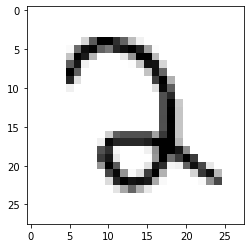

In [71]:
test_index = 187

predictions = model.predict(X_test)
plt.imshow(np.array(X_test.iloc[test_index]).reshape(28, 28), cmap=plt.cm.binary)
print(np.argmax(predictions[test_index]))